# E1 
## Import libraries and packages
**Cell 1** imports relevant libraries and packages, and gives some of them shorter nicknames. Python has many libraries and packages with useful functionalities e.g. matplotlib (aka "plt") for plotting and making figures and numpy (aka "np") for math. Details of different libraries and packages can be found in extensive documentation online. 

In [1]:
'''CELL 1'''

import nidaqmx # Used to interact with the National Instrument data acquisition driver
from nidaqmx import Task 
import matplotlib.pyplot as plt # Used for plotting 
import numpy as np # Useful functions for mathematical calculations
import warnings

## Define a function to acquire data

**Cell 2** defines a function 'get_potential_measurement' which reads the device and makes a data acquisition. Each acquisition samples the potential some number of times at some sampling rate. The function takes two arguments: <br>
> samp_rate = rate at which data is sampled per second <br>
  samp_num = total number of samples in a single data aquisition<br>

and returns: <br>
   >E_m = a list of all potentials sampled in the data acquisition

In [2]:
'''CELL 2'''

def get_potential_measurement(samp_rate, samp_num):
       
    # get a list of connected devices     
    all_devices = list(nidaqmx.system.System.local().devices)
    
    # throw error if no devices are found or if multiple devices are found
    if (len(all_devices) == 0):
        raise IOError("No DAQ device found")
    if (not (len(all_devices) == 1)):
        warnings.warn("More than one DAQ device found. Using the first device.")
        
    # otherwise use the first device that's found
    dev_name = all_devices[0].name
    
    # specify data acquisition parameters and destination of data
    # For CHEM174/274, the electrical potential range should always be -10V to +10V
    with Task() as task:
        task.ai_channels.add_ai_voltage_chan(dev_name + "/ai0", max_val=10, min_val=-10)  
        task.timing.cfg_samp_clk_timing(samp_rate, samps_per_chan=samp_num)
        E_m = task.read(samp_num, timeout=nidaqmx.constants.WAIT_INFINITELY)
    return E_m
    

## Make a single data acquisition and plot the data 

**Cell 3** makes a single data acquisition and plots the potential measured in each sampling. The x data plotted is an array containing the index of each sampling. The 'len()' function returns the number of items in an object which determines the length of the array. 'np.arange' generates the array.  Run the toy example in **TOY CELL** below to see how len() and np.arange work together.  Note that, for an array of n elements, indexing is from 0 to n-1. Feel free to delete **TOY CELL** and most of this markdown once you understand it.

[0 1 2 3]
[0.1, 0.5, 1.4, 4.1]


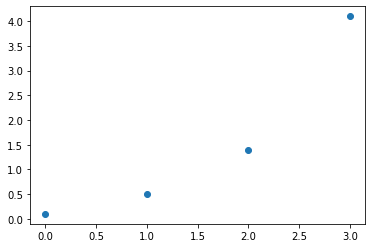

In [3]:
'''TOY CELL'''
y_array = [0.1, 0.5, 1.4, 4.1]
x_array = np.arange(len(y_array))
print(x_array)
print(y_array)
plt.scatter(x_array, y_array)

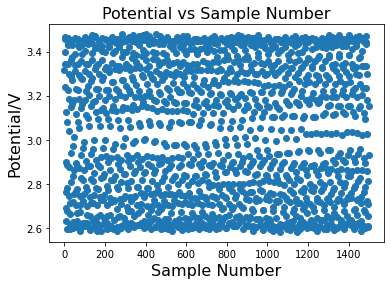

In [8]:
'''CELL 3'''

# define sampling rate and sampling number 
samp_rate = 1000
samp_num = 1500

# collect data 
measured_potential = get_potential_measurement(samp_rate, samp_num)

# plot data
plt.scatter(x = np.arange(len(measured_potential)), y = measured_potential)
plt.title('Potential vs Sample Number', fontsize = 16)
plt.xlabel('Sample Number', fontsize = 16)
plt.ylabel('Potential/V', fontsize = 16)


# Save figure in the current directory. Note this will overwrite existing images with the same filename 
plt.savefig('single_acquisition.png', dpi = 300, bbox_inches='tight')

## Replot smaller section of data

Change the plot limits to zoom in or out of the plot of the previous acquisition

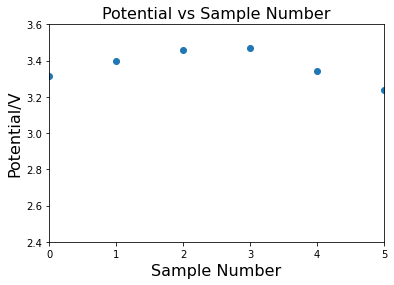

In [14]:
'''CELL 4'''
# plot data
plt.scatter(np.arange(len(measured_potential)), measured_potential)
plt.title('Potential vs Sample Number', fontsize = 16)
plt.xlabel('Sample Number', fontsize = 16)
plt.ylabel('Potential/V', fontsize = 16)
plt.xlim([0, 5])
plt.ylim([2.4, 3.6])

# Save figure in the current directory. Note this will overwrite existing images with the same filename 
plt.savefig('zoomed_acquisition.png', dpi = 300, bbox_inches='tight')

## Calculate the mean and standard deviation of the samples in a single acquisition

**Cell 5** calculates the mean and standard deviation of the previous data acquisition.  Notice that the floating point values are printed to full machine precision.  In general, you will want to adjust the print formatting to only show the significant figures in numerical values that you intend to share with others.

In [15]:
'''CELL 5'''

# Calculate mean and standard deviation of the samples in a single acquisition
potential_mean = np.mean(measured_potential)
potential_std = np.std(measured_potential)

print(f'The mean value of the samples is {potential_mean} V')
print(f'The standard deviation of the samples is {potential_std} V')

The mean value of the samples is 3.029362531892818 V
The standard deviation of the samples is 0.30060768341581295 V


## Create arrays to store mean and standard deviation of the samples from multiple acquisitions

**Cell 6** Initialises 2 empty arrays which will be populated with the mean and standard deviation of the samples in each acquisition.

In [23]:
'''CELL 6'''

mean_meas = []
std_meas = []

## Plot mean and standard deviation from multiple data acquisitions

**Cell 7** makes a single data acquisition, appends the mean and standard deviation of the samples in that acquisition to the 'mean_meas" and 'std_meas' arrays, and then plots these arrays. Running this multiple times will continuously add new data to the plot. 

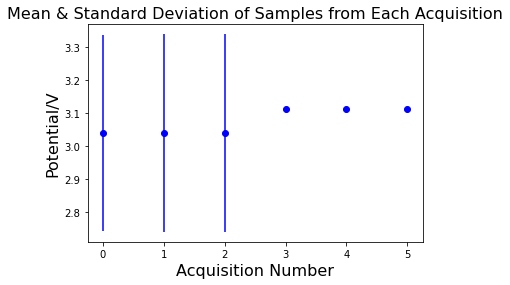

In [22]:
'''CELL 7'''

# define sampling rate and sampling number 
samp_rate = 1000
samp_num = 1500

# collect data
measured_potential = get_potential_measurement(samp_rate, samp_num)

# append mean and standard deviation of potential to 'mean_meas' and 'std_meas' which store data from all acquisitions
mean_meas.append(np.mean(measured_potential))
std_meas.append(np.std(measured_potential))

# plot error bars from all data acquisitions
plt.errorbar(x = np.arange(len(mean_meas)), y = mean_meas, yerr=std_meas,  fmt='bo')
plt.title('Mean & Standard Deviation of Samples from Each Acquisition', fontsize = 16)
plt.xlabel('Acquisition Number', fontsize = 16)
plt.xticks(range(0, len(mean_meas)))
plt.ylabel('Potential/V', fontsize = 16)
#plt.xlim([0, 100])

# Save figure in the current directory. Note this will overwrite existing images with the same filename 
plt.savefig('mean_with_std_dev.png', dpi = 300, bbox_inches='tight')
